In [3]:
import sys

sys.path.append("/home/code")

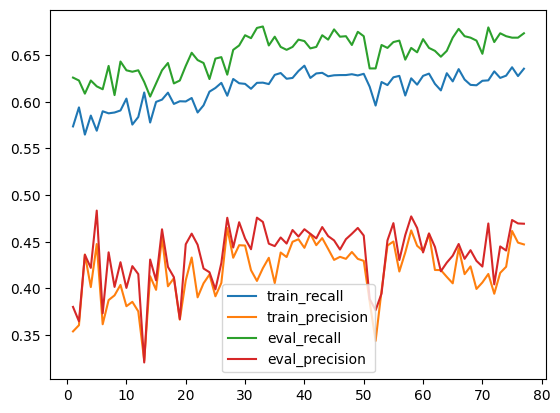

In [4]:

from database import *
import pandas as pd
import matplotlib.pyplot as plt
workdb = WorkDB()

workdb.get_all_id()
df = workdb.get_report_df("det_PPOCR_sangmu")

train_df = df[df["dataset"] == "train"]
eval_df = df[df["dataset"] == "eval"]

plt.plot(train_df["version"], train_df["recall"], label="train_recall")
plt.plot(train_df["version"], train_df["precision"], label="train_precision")

plt.plot(eval_df["version"], eval_df["recall"], label="eval_recall")
plt.plot(eval_df["version"], eval_df["precision"], label="eval_precision")
plt.legend()